In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris, load_digits
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("/mnt/c/Users/mercg/Downloads/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


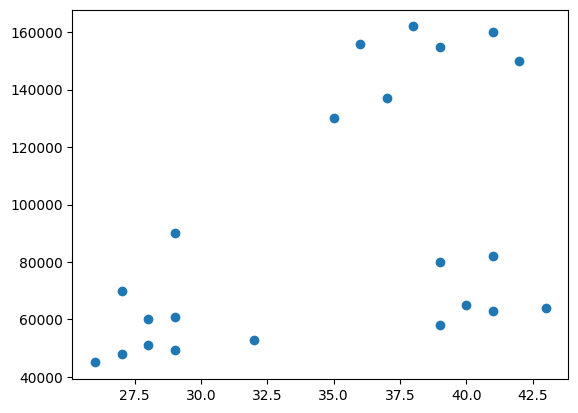

In [5]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [16]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])


In [17]:
km = KMeans(n_clusters= 3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


/tmp/ipykernel_8839/4220190842.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


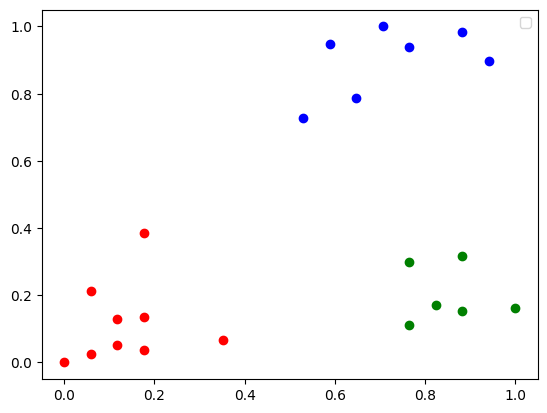

In [19]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
plt.scatter(df0['Age'], df0['Income($)'], c='red')
plt.scatter(df1['Age'], df1['Income($)'], c='blue')
plt.scatter(df2['Age'], df2['Income($)'], c='green')
plt.legend()
plt.show()

In [20]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [21]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [25]:
data = pd.DataFrame(iris.data, columns= iris.feature_names)
data = data.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


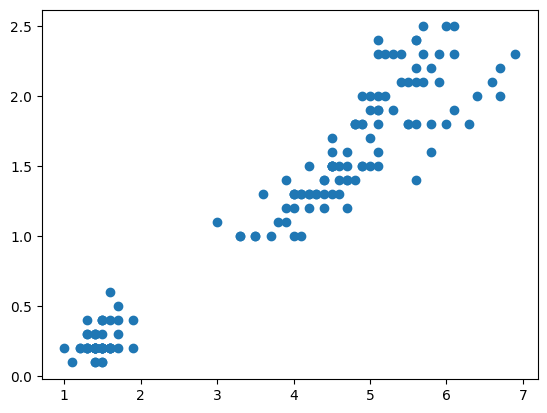

In [26]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])
plt.show()

In [34]:
km = KMeans(n_clusters= 3)
pred = km.fit_predict(data[['petal length (cm)']], data[['petal width (cm)']])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [35]:
data['clusters'] = pred
data

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,1
147,5.2,2.0,2
148,5.4,2.3,2


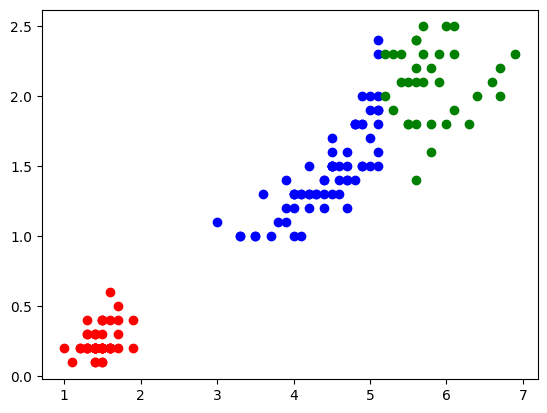

In [37]:
c0 = data[data['clusters'] == 0]
c1 = data[data['clusters'] == 1]
c2 = data[data['clusters'] == 2]
plt.scatter(c0['petal length (cm)'], c0['petal width (cm)'], color = 'red')
plt.scatter(c1['petal length (cm)'], c1['petal width (cm)'], color = 'blue')
plt.scatter(c2['petal length (cm)'], c2['petal width (cm)'], color = 'green')
plt.show()